In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Skirt', 'Sneaker', 'Bag', "Ankle boot"]

In [0]:
train_images.shape

(60000, 28, 28)

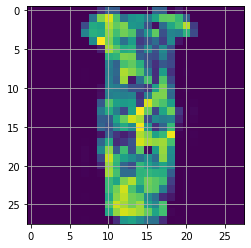

In [0]:
plt.figure()
plt.imshow(test_images[100])
plt.grid(True)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

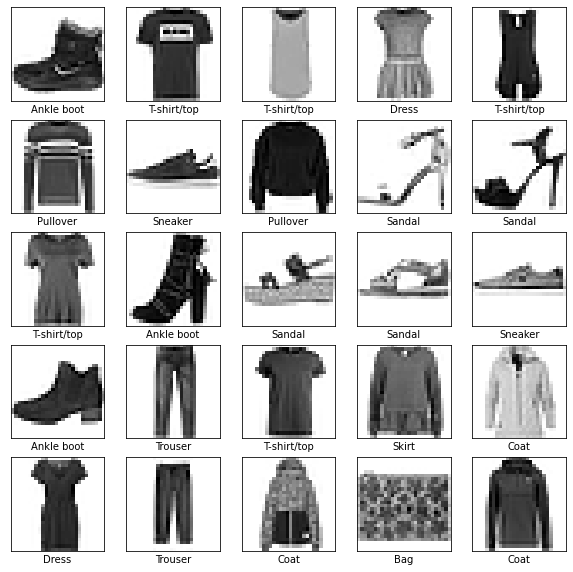

In [0]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
#quitar informacion inutil
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
#modelo optimizado con un evaluador
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5017 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2970 - accuracy: 0.8905


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8791


0.8791000247001648

In [0]:
predictions = model.predict(test_images)

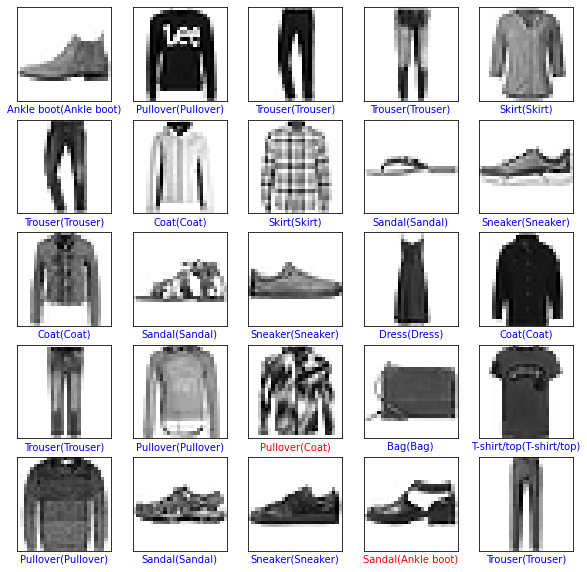

In [0]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel('{}({})'.format(class_names[predicted_label], class_names[true_label]), color = color)